In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Feb 12 15:52:21 2021

@author: Avell
"""

'''
# =============================================================================
# Visualizando Dataframes e vendo exemplos de saidas
# =============================================================================
'''

import pandas as pd
from collections import OrderedDict
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
from scipy.signal import argrelextrema
from scipy import interpolate
import os

def abreDataFrame(caminho,nomeArq):
    dataFrame = pd.read_pickle(caminho + nomeArq)#READ PICKLE MUITO IMPORTANTE!!!!!
    return dataFrame

def salvaDataFrames_csv(dataFrame,caminhoSaida,nomeArquivo):
    dataFrame.to_csv(caminhoSaida+'\/'+nomeArquivo, sep=',', encoding = 'utf-8')
       
def salvaDataFrames_pkl(dataFrame,caminhoSaida,nomeArquivo):
    dataFrame.to_pickle(caminhoSaida+'\/'+nomeArquivo, compression='infer')
    

path_dataframes_1 = 'D:\/DOUTORADO E PESQUISAS\/Pesquisa de Doutorado\/Thesis_Python\/DANI_MODELOS\/Modelos_Neurais\/DANI_2021\/Dados\/'

In [2]:
df_MMA_FULL_SN = abreDataFrame(path_dataframes_1,'Data_Frame_MMA_FULL.pkl')

In [3]:
df_MMA_FULL_SN.head()

,SN_NAME,HOST_GALAXY,OBJECT_TYPE,CATALOG_NAME,AUTHOR_REFERENCE,SPECTRA,LIGHT_CURVE
0,SN1998dx,UGC 11149,Ia,The Cfa Supernova Archive,"Blondin, Mandel, and Kirshner (2010)",FILE_NAME OBJECT_NAME ...,OBJECT_NAME ...
1,SN1998eg,UGC 12133,Ia,The Cfa Supernova Archive,"Blondin, Mandel, and Kirshner (2010)",FILE_NAME OBJECT_NAME ...,OBJECT_NAME TIME_M...
2,SN1998V,NGC 6627,Ia,The Cfa Supernova Archive,"Blondin, Mandel, and Kirshner (2010)",FILE_NAME OBJECT_NAME ...,OBJECT_NAME ...
3,SN1999aa,NGC 2595,Ia Pec,The Cfa Supernova Archive,"Blondin, Mandel, and Kirshner (2010)",FILE_NAME OBJECT_NAME...,OBJECT_NAME ...
4,SN1999cc,NGC 6038,Ia,The Cfa Supernova Archive,"Blondin, Mandel, and Kirshner (2010)",FILE_NAME OBJECT_NAME ...,OBJECT_NAME ...


## PRINCIPAIS SAIDAS DO MMA_SN

In [4]:
df_mma_full_slice = df_MMA_FULL_SN.loc[0:20]

#MAKE A SLICE FROM MMA_FULL, GETTING THE LC AND SPECTRA
df_lc = df_mma_full_slice.loc[:,'LIGHT_CURVE']
df_spc = df_mma_full_slice.loc[0,'SPECTRA']



In [5]:
df_spc.loc[3,'FILE_NAME']

'sn1998dx-19980918.flm'

In [6]:
df_THESIS_SN = abreDataFrame(path_dataframes_1,'Data_Frame_THESIS_SN.pkl')

In [7]:
df_THESIS_SN.head()

,FILE_NAME,OBJECT_NAME,CAPTURE_DATE,INSTRUMENTS,CATALOG_NAME,AUTHOR_REFERENCE,SNX_WAVELENGTHS,SNY_FLUX,SPECTRAL_PHASE,Z_REDSHIFT,HOST_GALAXY,OBJECT_Type
0,sn1998dx-19980914.flm,SN1998dx,1998-09-14 00:00:00,FLWO 1.5m+FAST,The Cfa Supernova Archive,"Blondin, Mandel, and Kirshner (2010)","[3720.0, 3721.5, 3723.0, 3724.5, 3726.0, 3727....","[0.703485, 0.723747, 0.593587, 0.543345, 0.607...",-1.890,0.054221,UGC 11149,Ia
1,sn1998dx-19980915.flm,SN1998dx,1998-09-15 00:00:00,FLWO 1.5m+FAST,The Cfa Supernova Archive,"Blondin, Mandel, and Kirshner (2010)","[3720.0, 3721.5, 3723.0, 3724.5, 3726.0, 3727....","[0.586107, 0.4552, 0.42392, 0.466335, 0.317868...",-1.890,0.054221,UGC 11149,Ia
2,sn1998dx-19980917.flm,SN1998dx,1998-09-17 00:00:00,FLWO 1.5m+FAST,The Cfa Supernova Archive,"Blondin, Mandel, and Kirshner (2010)","[3720.0, 3721.5, 3723.0, 3724.5, 3726.0, 3727....","[0.217942, 0.231314, 0.207601, 0.022052, 0.243...",-1.890,0.054221,UGC 11149,Ia
3,sn1998dx-19980918.flm,SN1998dx,1998-09-18 00:00:00,FLWO 1.5m+FAST,The Cfa Supernova Archive,"Blondin, Mandel, and Kirshner (2010)","[3720.0, 3721.5, 3723.0, 3724.5, 3726.0, 3727....","[0.420207, 0.609376, 0.545307, 0.388906, 0.387...",-1.890,0.054221,UGC 11149,Ia
4,sn1998eg-19981024.flm,SN1998eg,1998-10-24 00:00:00,FLWO 1.5m+FAST,The Cfa Supernova Archive,"Blondin, Mandel, and Kirshner (2010)","[3720.0, 3721.5, 3723.0, 3724.5, 3726.0, 3727....","[1.55552, 1.63705, 1.92126, 1.77282, 1.65595, ...",-0.956,0.024760,UGC 12133,Ia


In [8]:
df_THESIS_SN_NORMALIZED = abreDataFrame(path_dataframes_1,'Data_Frame_THESIS_SN_NORMALIZED.pkl')

In [9]:
df_THESIS_SN_NORMALIZED.head()

,FILE_NAME,OBJECT_NAME,CAPTURE_DATE,INSTRUMENTS,CATALOG_NAME,AUTHOR_REFERENCE,SNX_WAVELENGTHS,SNY_FLUX,SPECTRAL_PHASE,Z_REDSHIFT,HOST_GALAXY,OBJECT_Type,SNX_NORMALIZED,SNY_NORMALIZED
0,sn1998dx-19980914.flm,SN1998dx,1998-09-14 00:00:00,FLWO 1.5m+FAST,The Cfa Supernova Archive,"Blondin, Mandel, and Kirshner (2010)","[3720.0, 3721.5, 3723.0, 3724.5, 3726.0, 3727....","[0.703485, 0.723747, 0.593587, 0.543345, 0.607...",-1.890,0.054221,UGC 11149,Ia,"[3528.671881891937, 3532.29951245927, 3535.927...","[0.951033144583727, 0.874705041426219, 0.82222..."
1,sn1998dx-19980915.flm,SN1998dx,1998-09-15 00:00:00,FLWO 1.5m+FAST,The Cfa Supernova Archive,"Blondin, Mandel, and Kirshner (2010)","[3720.0, 3721.5, 3723.0, 3724.5, 3726.0, 3727....","[0.586107, 0.4552, 0.42392, 0.466335, 0.317868...",-1.890,0.054221,UGC 11149,Ia,"[3528.671881891937, 3532.29951245927, 3535.927...","[0.9336562914192013, 0.8202276475798898, 0.749..."
2,sn1998dx-19980917.flm,SN1998dx,1998-09-17 00:00:00,FLWO 1.5m+FAST,The Cfa Supernova Archive,"Blondin, Mandel, and Kirshner (2010)","[3720.0, 3721.5, 3723.0, 3724.5, 3726.0, 3727....","[0.217942, 0.231314, 0.207601, 0.022052, 0.243...",-1.890,0.054221,UGC 11149,Ia,"[3528.671881891937, 3532.29951245927, 3535.927...","[0.49561577855901595, 0.6598588802697674, 0.73..."
3,sn1998dx-19980918.flm,SN1998dx,1998-09-18 00:00:00,FLWO 1.5m+FAST,The Cfa Supernova Archive,"Blondin, Mandel, and Kirshner (2010)","[3720.0, 3721.5, 3723.0, 3724.5, 3726.0, 3727....","[0.420207, 0.609376, 0.545307, 0.388906, 0.387...",-1.890,0.054221,UGC 11149,Ia,"[3528.671881891937, 3532.29951245927, 3535.927...","[0.5954063726312602, 0.6035925242898851, 0.619..."
4,sn1998eg-19981024.flm,SN1998eg,1998-10-24 00:00:00,FLWO 1.5m+FAST,The Cfa Supernova Archive,"Blondin, Mandel, and Kirshner (2010)","[3720.0, 3721.5, 3723.0, 3724.5, 3726.0, 3727....","[1.55552, 1.63705, 1.92126, 1.77282, 1.65595, ...",-0.956,0.024760,UGC 12133,Ia,"[3630.118271595301, 3633.7725367351823, 3637.4...","[0.70569023326759, 0.7067640677235862, 0.70346..."


In [10]:
df_MMA_SN_SYNTHETIC = abreDataFrame(path_dataframes_1,'Data_Frame_MMA_SN_SYNTHETIC.pkl')

In [11]:
df_MMA_SN_SYNTHETIC.head()

,SN_NAME,HOST_GALAXY,OBJECT_TYPE,CATALOG_NAME,AUTHOR_REFERENCE,SPECTRA
0,SN_Artificial_AIAI_0,Galaxy_Artificial_AIAI_0,Ia,TARDIS_Synthesized,"Xingzhuo Chen, Lei Hu and Lifan Wang - Artific...",FILE_NAME OBJECT_N...
1,SN_Artificial_AIAI_1,Galaxy_Artificial_AIAI_1,Ia,TARDIS_Synthesized,"Xingzhuo Chen, Lei Hu and Lifan Wang - Artific...",FILE_NAME OBJECT_N...
2,SN_Artificial_AIAI_2,Galaxy_Artificial_AIAI_2,Ia,TARDIS_Synthesized,"Xingzhuo Chen, Lei Hu and Lifan Wang - Artific...",FILE_NAME OBJECT_N...
3,SN_Artificial_AIAI_3,Galaxy_Artificial_AIAI_3,Ia,TARDIS_Synthesized,"Xingzhuo Chen, Lei Hu and Lifan Wang - Artific...",FILE_NAME OBJECT_N...
4,SN_Artificial_AIAI_4,Galaxy_Artificial_AIAI_4,Ia,TARDIS_Synthesized,"Xingzhuo Chen, Lei Hu and Lifan Wang - Artific...",FILE_NAME OBJECT_N...


In [12]:
## Plotting The Result of the 4 DATAFRAMES

#Fazendo slices já com as fontes desejadas
df_mma_full_slice = df_MMA_FULL_SN.loc[0:20]
df_synthetic_slice = df_MMA_SN_SYNTHETIC.loc[0:20]

#estes aqui já estão com os espectros// só com espectros
df_thesis_sn_slice = df_THESIS_SN
df_thesis_normalized_slice = df_THESIS_SN_NORMALIZED



#Selecting the Source - Selecionando a Fonte especifica
#df1_source = df_mma_full_slice.loc[:,'SPECTRA']
# df2_source = df_thesis_sn_slice.loc[0,'SPECTRA'] # Já estão só com a fonte
# df3_source = df_thesis_normalized_slice.loc[0,'SPECTRA']
#df4_source = df_synthetic_slice.loc[:,'SPECTRA']


In [13]:
df_MMA_FULL_SN.head()

,SN_NAME,HOST_GALAXY,OBJECT_TYPE,CATALOG_NAME,AUTHOR_REFERENCE,SPECTRA,LIGHT_CURVE
0,SN1998dx,UGC 11149,Ia,The Cfa Supernova Archive,"Blondin, Mandel, and Kirshner (2010)",FILE_NAME OBJECT_NAME ...,OBJECT_NAME ...
1,SN1998eg,UGC 12133,Ia,The Cfa Supernova Archive,"Blondin, Mandel, and Kirshner (2010)",FILE_NAME OBJECT_NAME ...,OBJECT_NAME TIME_M...
2,SN1998V,NGC 6627,Ia,The Cfa Supernova Archive,"Blondin, Mandel, and Kirshner (2010)",FILE_NAME OBJECT_NAME ...,OBJECT_NAME ...
3,SN1999aa,NGC 2595,Ia Pec,The Cfa Supernova Archive,"Blondin, Mandel, and Kirshner (2010)",FILE_NAME OBJECT_NAME...,OBJECT_NAME ...
4,SN1999cc,NGC 6038,Ia,The Cfa Supernova Archive,"Blondin, Mandel, and Kirshner (2010)",FILE_NAME OBJECT_NAME ...,OBJECT_NAME ...


In [14]:
import seaborn as sns
def recover_Information_Tardis(mma_slice,index,source,color):
    print('Main Information About SN')
    print('--------------------------------------------------')
    print("SN_NAME:  " , mma_slice.loc[index,'SN_NAME'])
    print("HOST_GALAXY:  " , mma_slice.loc[index,'HOST_GALAXY'])
    print("OBJECT_TYPE:  " ,mma_slice.loc[index,'OBJECT_TYPE'])
    print("CATALOG_NAME:  " ,mma_slice.loc[index,'CATALOG_NAME'])
    print("AUTHOR:  " ,mma_slice.loc[index,'AUTHOR_REFERENCE'])
    print('--------------------------------------------------')
    df_slice = mma_slice.loc[index,source]
    print("FILE_NAME:  " ,df_slice.loc[0,'FILE_NAME'])
    print("OBJECT_NAME:  " ,df_slice.loc[0,'OBJECT_NAME'])
    print("SPECTRAL PHASE:  " ,df_slice.loc[0,'SPECTRAL_PHASE'])
    print("REDSHIFT (Z):  " ,df_slice.loc[0,'Z_REDSHIFT_DANI'])    
    
    figure = plt.figure(figsize=(20,5))
    plt.style.use('ggplot')
    sns.set(style="darkgrid")
    plt.plot(df_slice.loc[0,'SNX_WAVELENGTHS'], df_slice.loc[0,'SNY_FLUX'],color, label= str(mma_slice.loc[index,'SN_NAME']) +'\n'
             +"Type: " + str(mma_slice.loc[index,'OBJECT_TYPE'])+'\n'
             +"Redshift(Z): "+str(df_slice.loc[0,'Z_REDSHIFT_DANI'])+'\n'
             + "Phase (days): " + str(df_slice.loc[0,'SPECTRAL_PHASE']))
    plt.title("Supernovae Source Plot (" + source + ") - " + str(mma_slice.loc[index,'SN_NAME']))
    plt.xlabel("Wavelenghts")
    plt.ylabel("Radiation Flux")
    plt.legend()
    print('--------------------------------------------------')
    
def recover_Information_mma(mma_slice,index,source,color):
    print('Main Information About SN')
    print('--------------------------------------------------')
    print("SN_NAME:  " , mma_slice.loc[index,'SN_NAME'])
    print("HOST_GALAXY:  " , mma_slice.loc[index,'HOST_GALAXY'])
    print("OBJECT_TYPE:  " ,mma_slice.loc[index,'OBJECT_TYPE'])
    print("CATALOG_NAME:  " ,mma_slice.loc[index,'CATALOG_NAME'])
    print("AUTHOR:  " ,mma_slice.loc[index,'AUTHOR_REFERENCE'])
    
    print('--------------------------------------------------')
    df_slice = mma_slice.loc[index,source]
    avaiable_files = int(mma_slice.loc[:,source].count())-1
    print("AVAILABLE FILES: ", str(mma_slice.loc[:,source].count()-1))
    
    file = int(input("Enter the avaiable file position in the range of 0 ~ "+str(avaiable_files)+" :"))
    print("FILE_NAME:  " ,df_slice.loc[file,'FILE_NAME'])
    print("OBJECT_NAME:  " ,df_slice.loc[file,'OBJECT_NAME'])
    print("SPECTRAL PHASE:  " ,df_slice.loc[file,'SPECTRAL_PHASE'])
    print("REDSHIFT (Z):  " ,df_slice.loc[file,'Z_REDSHIFT'])    
    
    
    figure = plt.figure(figsize=(20,5))
    plt.style.use('ggplot')
    sns.set(style="darkgrid")
    plt.plot(df_slice.loc[file,'SNX_WAVELENGTHS'], df_slice.loc[file,'SNY_FLUX'],color, label= str(mma_slice.loc[index,'SN_NAME']) +'\n'
             +"Type: " + str(mma_slice.loc[index,'OBJECT_TYPE'])+'\n'
             +"Redshift(Z): "+str(df_slice.loc[file,'Z_REDSHIFT'])+'\n'
             + "Phase (days): " + str(df_slice.loc[file,'SPECTRAL_PHASE']))
    plt.title("Supernovae Source Plot (" + source + ") - " + str(mma_slice.loc[index,'SN_NAME']))
    plt.xlabel("Wavelenghts")
    plt.ylabel("Radiation Flux")
    plt.legend()
    print('--------------------------------------------------')    
    

Main Information About SN
--------------------------------------------------
SN_NAME:   SN_Artificial_AIAI_15
HOST_GALAXY:   Galaxy_Artificial_AIAI_15
OBJECT_TYPE:   Ia
CATALOG_NAME:   TARDIS_Synthesized
AUTHOR:   Xingzhuo Chen, Lei Hu and Lifan Wang - Artificial Intelligence Assisted Inversion (AIAI) of Synthetic Type Ia Supernova Spectra 2020
--------------------------------------------------
FILE_NAME:   TARDIS_Synthetic_DATA_15
OBJECT_NAME:   SN_TARDIS_Synthetic_15
SPECTRAL PHASE:   0
REDSHIFT (Z):   0
--------------------------------------------------


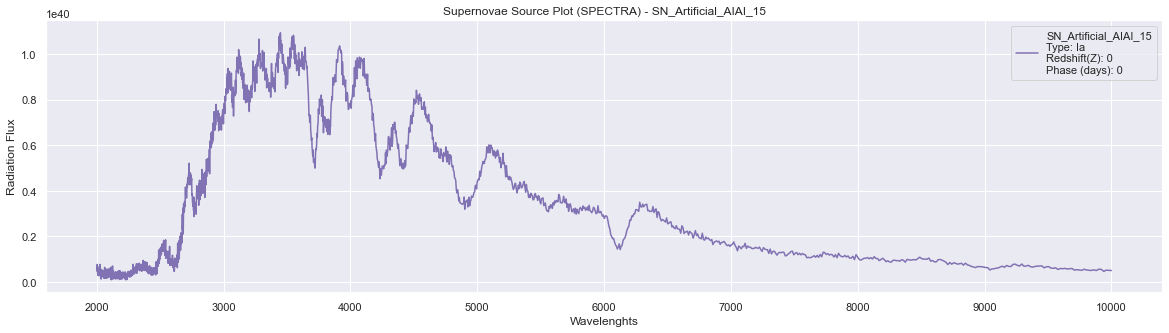

In [15]:
recover_Information_Tardis(df_synthetic_slice,15,'SPECTRA','m')


Main Information About SN
--------------------------------------------------
SN_NAME:   SN1998dx
HOST_GALAXY:   UGC 11149
OBJECT_TYPE:   Ia
CATALOG_NAME:   The Cfa Supernova Archive
AUTHOR:   Blondin, Mandel, and Kirshner (2010)
--------------------------------------------------
AVAILABLE FILES:  20
Enter the avaiable file position in the range of 0 ~ 20 :8
FILE_NAME:   sn1998dx-19980922.12-fast.flm
OBJECT_NAME:   SN1998dx
SPECTRAL PHASE:   17.4
REDSHIFT (Z):   0.054221
--------------------------------------------------


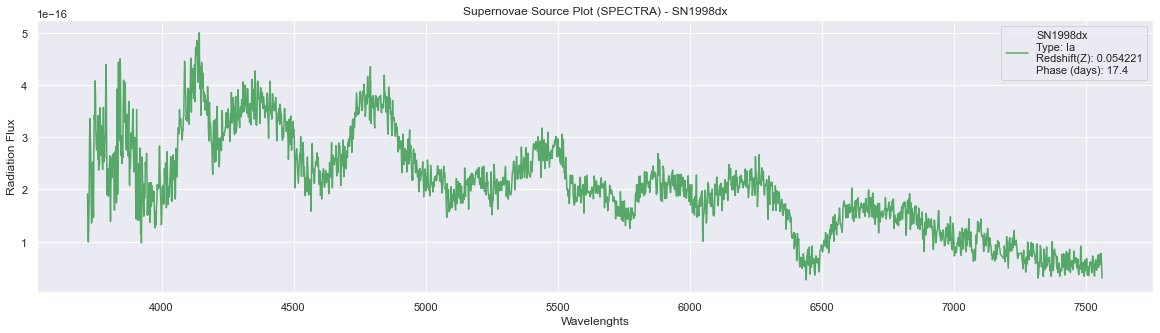

In [16]:
recover_Information_mma(df_mma_full_slice,0,'SPECTRA','g')

In [17]:
df_synthetic_slice.head()

,SN_NAME,HOST_GALAXY,OBJECT_TYPE,CATALOG_NAME,AUTHOR_REFERENCE,SPECTRA
0,SN_Artificial_AIAI_0,Galaxy_Artificial_AIAI_0,Ia,TARDIS_Synthesized,"Xingzhuo Chen, Lei Hu and Lifan Wang - Artific...",FILE_NAME OBJECT_N...
1,SN_Artificial_AIAI_1,Galaxy_Artificial_AIAI_1,Ia,TARDIS_Synthesized,"Xingzhuo Chen, Lei Hu and Lifan Wang - Artific...",FILE_NAME OBJECT_N...
2,SN_Artificial_AIAI_2,Galaxy_Artificial_AIAI_2,Ia,TARDIS_Synthesized,"Xingzhuo Chen, Lei Hu and Lifan Wang - Artific...",FILE_NAME OBJECT_N...
3,SN_Artificial_AIAI_3,Galaxy_Artificial_AIAI_3,Ia,TARDIS_Synthesized,"Xingzhuo Chen, Lei Hu and Lifan Wang - Artific...",FILE_NAME OBJECT_N...
4,SN_Artificial_AIAI_4,Galaxy_Artificial_AIAI_4,Ia,TARDIS_Synthesized,"Xingzhuo Chen, Lei Hu and Lifan Wang - Artific...",FILE_NAME OBJECT_N...


In [18]:
##Normalize and Create the Synthetic SN normalized
'''
# =============================================================================
# NORMALIZANDO OS ESPECTROS
# =============================================================================
'''

#limites dos espetros
lim_superior = 7500
lim_inferior = 3500

def delimitadorAngstrons(SNx,SNy):
    delSNx = []
    delSNy = []    
    for i in range(0,len(SNx)):
        if (SNx[i] >= lim_inferior and SNx[i]<=lim_superior):
            delSNx.append(SNx[i])
            delSNy.append(SNy[i])
    
    return delSNx,delSNy    

#Normalizando o Fluxo
def normalFlux(fluxo):
    maxFlux = np.nanmax(fluxo);
    minFlux = np.nanmin(fluxo);
    
    return np.float64(fluxo - minFlux)/(maxFlux - minFlux);
#fim função
    
##Interpolando os espectros
def interpola(vetorx, vetory,pontos):
    x = np.array(vetorx)
    y= np.array(vetory)
    xnew = np.linspace(np.min(x),np.max(x),pontos)
    ynew = interp1d(x,y,kind='linear')
    return xnew,ynew(xnew)

##Projeto para o Filtro Savitzky Golay
#Janela de 71, polinomio de 9 - ARTIGO DUPLA FILTRAGEM
def savitzky_golay(vetorX,vetorY, ws,ordem,diff):
    x = np.array(vetorX)
    y = np.array(vetorY)

    window_size, poly_order = ws, ordem
    yy_sg = savgol_filter(y, window_size, poly_order,diff)
    
    return x,yy_sg
#fim função

def dupla_filtragem_SDFSG(Sinalx,Sinaly):
    Simples_Sinalx, Simples_Sinaly = savitzky_golay(Sinalx, Sinaly,71,9,0)#x,y,window,ordem do polinomio#            
    Dupla_Sinalx, Dupla_Sinaly = savitzky_golay(Simples_Sinalx, Simples_Sinaly,71,9,0)#x,y,window,ordem do polinomio#
    return Dupla_Sinalx,Dupla_Sinaly        
    

'''
AJUSTE DE REDSHIFT
'''
##Construindo Ajuste do RedShift ou do Deslocamento de Doppler
def ajusteRedShift (angstrons,zhel):
    angstrons = (angstrons)/(zhel+1)
    return angstrons    
#fim função



In [19]:
'''
# =============================================================================
# REMOVE NAN VALUES OF SN ARRAYS
# =============================================================================
'''
#Percorrer dataFrame
def removeNaN(SNx,SNy):
    #verifica se todos os valores são NAN  e retorna a posição para excluir
    posY = np.argwhere(np.isnan(SNy))
    #posX = np.argwhere(np.isnan(SNy))
    if len(posY) != 0:  
        SNy = np.delete(SNy,posY)
        SNx = np.delete(SNx,posY)
    return SNx,SNy        


## Os dados sinteticos não tem redshift e nem phase - esses serão feitos pela DANI Multilearning.

In [20]:
df_thesis_SN_Normalized = df_MMA_SN_SYNTHETIC['SPECTRA']

# Get names of indexes for which column Age has value 30
indexNames =  df_thesis_SN_Normalized[df_thesis_SN_Normalized['SNX_WAVELENGTHS'] == 'nan' ].index
# Delete these row indexes from dataFrame
df_thesis_SN_Normalized.drop(indexNames , inplace=True)
df_thesis_SN_Normalized = df_thesis_SN_Normalized.reset_index(drop=True)

df_thesis_SN_Normalized = df_thesis_SN_Normalized[pd.notnull(df_thesis_SN_Normalized['SPECTRAL_PHASE'])]
df_thesis_SN_Normalized = df_thesis_SN_Normalized[pd.notnull(df_thesis_SN_Normalized['SNX_WAVELENGTHS'])]
df_thesis_SN_Normalized = df_thesis_SN_Normalized[pd.notnull(df_thesis_SN_Normalized['Z_REDSHIFT'])]
df_thesis_SN_Normalized = df_thesis_SN_Normalized[pd.notnull(df_thesis_SN_Normalized['SNY_FLUX'])]

df_thesis_SN_Normalized = df_thesis_SN_Normalized.reset_index(drop=True)


KeyError: 'SNX_WAVELENGTHS'

In [23]:
test = df_MMA_FULL_SN
test.head()

,SN_NAME,HOST_GALAXY,OBJECT_TYPE,CATALOG_NAME,AUTHOR_REFERENCE,SPECTRA,LIGHT_CURVE
0,SN1998dx,UGC 11149,Ia,The Cfa Supernova Archive,"Blondin, Mandel, and Kirshner (2010)",FILE_NAME OBJECT_NAME ...,OBJECT_NAME ...
1,SN1998eg,UGC 12133,Ia,The Cfa Supernova Archive,"Blondin, Mandel, and Kirshner (2010)",FILE_NAME OBJECT_NAME ...,OBJECT_NAME TIME_M...
2,SN1998V,NGC 6627,Ia,The Cfa Supernova Archive,"Blondin, Mandel, and Kirshner (2010)",FILE_NAME OBJECT_NAME ...,OBJECT_NAME ...
3,SN1999aa,NGC 2595,Ia Pec,The Cfa Supernova Archive,"Blondin, Mandel, and Kirshner (2010)",FILE_NAME OBJECT_NAME...,OBJECT_NAME ...
4,SN1999cc,NGC 6038,Ia,The Cfa Supernova Archive,"Blondin, Mandel, and Kirshner (2010)",FILE_NAME OBJECT_NAME ...,OBJECT_NAME ...


In [29]:
sp = test.loc[6,'SPECTRA']

sp.head()
print(sp.index)

RangeIndex(start=0, stop=17, step=1)


In [32]:
test2 = df_MMA_SN_SYNTHETIC
sp2 = test2.loc[6,'SPECTRA']
sp2.head()

,FILE_NAME,OBJECT_NAME,CATALOG_NAME,AUTHOR_REFERENCE,SNX_WAVELENGTHS,SNY_FLUX,SPECTRAL_PHASE,Z_REDSHIFT_DANI,ELEMENTS_ABUNDANCES
0,TARDIS_Synthetic_DATA_6,SN_TARDIS_Synthetic_6,TARDIS_Synthesized,"Xingzhuo Chen, Lei Hu and Lifan Wang - Artific...","[10000.0, 9980.039920159681, 9960.1593625498, ...","[[5.0382378532944954e+38], [3.818984384221549e...",0,0,6_1 2.793974 6_2 2.847573 6_3 0.07...


In [42]:
'''
# =============================================================================
# NORMALIZANDO OS ESPECTROS - E CRIA UMA NOVA COLUNA NO DATAFRAME
# =============================================================================
'''
def normalize_spectra(df):    
    for i in range(10):
        lista_SNX_normalized = []
        lista_SNY_normalized = []
        df_slice = df.loc[i,'SPECTRA']
        print(i)
        print(df_slice.loc[0,'FILE_NAME'])
        
        SNx = df_slice.loc[0,'SNX_WAVELENGTHS']
        SNy = df_slice.loc[0,'SNY_FLUX']
#         print(SNx.size)
#         print(SNy.size)
        
#         print(SNx.shape)
#         print(SNy.shape)
        SNy  = SNy.reshape(2000,)
        #plt.plot(SNx,SNy)
        
        #Remove Nan
        SNx,SNy = removeNaN(SNx,SNy)
        
        #ajusta redshift
        #SNx = ajusteRedShift(SNx,zhel)
       
        #Interpola
        SNx,SNy = interpola(SNx,SNy,1000)
        
        #normaliza fluxo
        SNy = normalFlux(SNy)
        
        #delimita -  NAO DELIMITAMOS AGORA PARA EVITAR ALGUNS ERROS
        #DEVEMOS DELIMITAR E EXCLUIR QUEM ESTÁ FORA DO RANGE
        #SNx,SNy = delimitadorAngstrons(SNx,SNy)

        #Dupla Filtragem
        SNx,SNy = dupla_filtragem_SDFSG(SNx,SNy)
        
        lista_SNX_normalized.append(SNx)
        lista_SNY_normalized.append(SNy)
        
        df_slice[0,'SNX_NORMALIZED'] = lista_SNX_normalized
        df_slice[0,'SNY_NORMALIZED'] = lista_SNY_normalized
    
#     df_slice['SNX_NORMALIZED'] = lista_SNX_normalized
#     df_slice['SNY_NORMALIZED'] = lista_SNY_normalized
    return df_slice

#Normaliza
df_synthetic_normalized = normalize_spectra(df_MMA_SN_SYNTHETIC)

0
TARDIS_Synthetic_DATA_0
1
TARDIS_Synthetic_DATA_1
2
TARDIS_Synthetic_DATA_2
3
TARDIS_Synthetic_DATA_3
4
TARDIS_Synthetic_DATA_4
5
TARDIS_Synthetic_DATA_5
6
TARDIS_Synthetic_DATA_6
7
TARDIS_Synthetic_DATA_7
8
TARDIS_Synthetic_DATA_8
9
TARDIS_Synthetic_DATA_9


In [112]:
test = df_MMA_FULL_SN.loc[:,'SPECTRA']

In [113]:
test.head()

0                            FILE_NAME OBJECT_NAME ...
1                            FILE_NAME OBJECT_NAME ...
2                           FILE_NAME OBJECT_NAME  ...
3                             FILE_NAME OBJECT_NAME...
4                            FILE_NAME OBJECT_NAME ...
Name: SPECTRA, dtype: object

In [ ]:
#salvaDataFrames_csv(df_synthetic_normalized,path_dataframes_1,'Data_Frame_Synthetic_SN_NORMALIZED.csv')
#salvaDataFrames_pkl(df_synthetic_normalized,path_dataframes_1,'Data_Frame_Synthetic_SN_NORMALIZED.pkl')

In [43]:
df_synthetic_normalized

,FILE_NAME,OBJECT_NAME,CATALOG_NAME,AUTHOR_REFERENCE,SNX_WAVELENGTHS,SNY_FLUX,SPECTRAL_PHASE,Z_REDSHIFT_DANI,ELEMENTS_ABUNDANCES,"(0, SNX_NORMALIZED)","(0, SNY_NORMALIZED)"
0,TARDIS_Synthetic_DATA_9,SN_TARDIS_Synthetic_9,TARDIS_Synthesized,"Xingzhuo Chen, Lei Hu and Lifan Wang - Artific...","[10000.0, 9980.039920159681, 9960.1593625498, ...","[[4.884372300129268e+38], [5.115393091935836e+...",0,0,6_1 2.139359 6_2 1.388777 6_3 2.30...,"[2000.8003201280512, 2008.80752701481, 2016.81...","[0.005388603422845723, 0.00533813823989858, 0...."


In [44]:
df_MMA_SN_SYNTHETIC

,SN_NAME,HOST_GALAXY,OBJECT_TYPE,CATALOG_NAME,AUTHOR_REFERENCE,SPECTRA
0,SN_Artificial_AIAI_0,Galaxy_Artificial_AIAI_0,Ia,TARDIS_Synthesized,"Xingzhuo Chen, Lei Hu and Lifan Wang - Artific...",FILE_NAME OBJECT_N...
1,SN_Artificial_AIAI_1,Galaxy_Artificial_AIAI_1,Ia,TARDIS_Synthesized,"Xingzhuo Chen, Lei Hu and Lifan Wang - Artific...",FILE_NAME OBJECT_N...
2,SN_Artificial_AIAI_2,Galaxy_Artificial_AIAI_2,Ia,TARDIS_Synthesized,"Xingzhuo Chen, Lei Hu and Lifan Wang - Artific...",FILE_NAME OBJECT_N...
3,SN_Artificial_AIAI_3,Galaxy_Artificial_AIAI_3,Ia,TARDIS_Synthesized,"Xingzhuo Chen, Lei Hu and Lifan Wang - Artific...",FILE_NAME OBJECT_N...
4,SN_Artificial_AIAI_4,Galaxy_Artificial_AIAI_4,Ia,TARDIS_Synthesized,"Xingzhuo Chen, Lei Hu and Lifan Wang - Artific...",FILE_NAME OBJECT_N...
...,...,...,...,...,...,...
117052,SN_Artificial_AIAI_117052,Galaxy_Artificial_AIAI_117052,Ia,TARDIS_Synthesized,"Xingzhuo Chen, Lei Hu and Lifan Wang - Artific...",FILE_NAME ...
117053,SN_Artificial_AIAI_117053,Galaxy_Artificial_AIAI_117053,Ia,TARDIS_Synthesized,"Xingzhuo Chen, Lei Hu and Lifan Wang - Artific...",FILE_NAME ...
117054,SN_Artificial_AIAI_117054,Galaxy_Artificial_AIAI_117054,Ia,TARDIS_Synthesized,"Xingzhuo Chen, Lei Hu and Lifan Wang - Artific...",FILE_NAME ...
117055,SN_Artificial_AIAI_117055,Galaxy_Artificial_AIAI_117055,Ia,TARDIS_Synthesized,"Xingzhuo Chen, Lei Hu and Lifan Wang - Artific...",FILE_NAME ...


In [49]:
test = pd.DataFrame(df_MMA_SN_SYNTHETIC['SPECTRA'])

,SPECTRA
0,FILE_NAME OBJECT_N...
1,FILE_NAME OBJECT_N...
2,FILE_NAME OBJECT_N...
3,FILE_NAME OBJECT_N...
4,FILE_NAME OBJECT_N...
...,...
117052,FILE_NAME ...
117053,FILE_NAME ...
117054,FILE_NAME ...
117055,FILE_NAME ...
